## TASK 1

In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


dataset = pd.read_csv('ecommerce.csv')


dataset_for_clustering = dataset.dropna()
scaler = StandardScaler()
dataset_scaled = scaler.fit_transform(dataset_for_clustering)






Applying K-means for k-ranges and calculating the best clusters using elbow method

c:\Users\prana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\prana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\prana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\prana\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

Text(0.5, 1.0, 'Elbow Method For Optimal k')

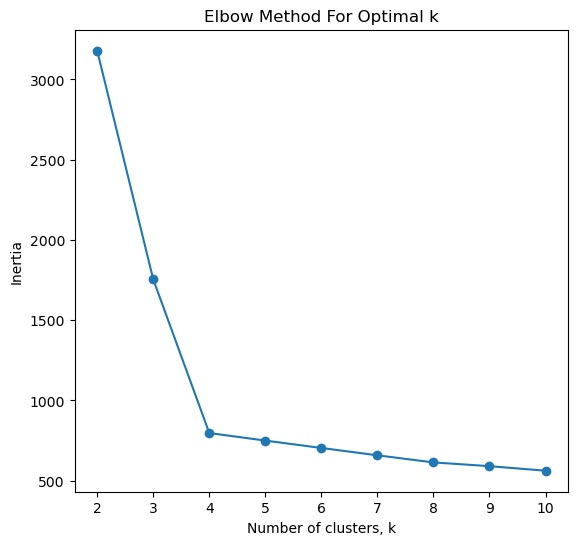

In [3]:
inertia = []
K_range = range(2, 11)  # Example range from 2 to 10 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    

# Plot the Elbow curve
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')

The graph presents our elbow method. The plot displays the within cluster sum of squares (inertia) against the number of clusters (k). As we increase k the inertia decreases.At k=4 there is a change in the rate of decrease creating a bend or "elbow" in the graph. This indicates that beyond four clusters adding more clusters doesn't result in a reduction in inertia. Therefore based on this elbow method it is likely that four clusters would be optimal for this dataset since thats where we start to see a decrease in inertia. To cross check the number of clusters we also try hierarchial clustering as well.

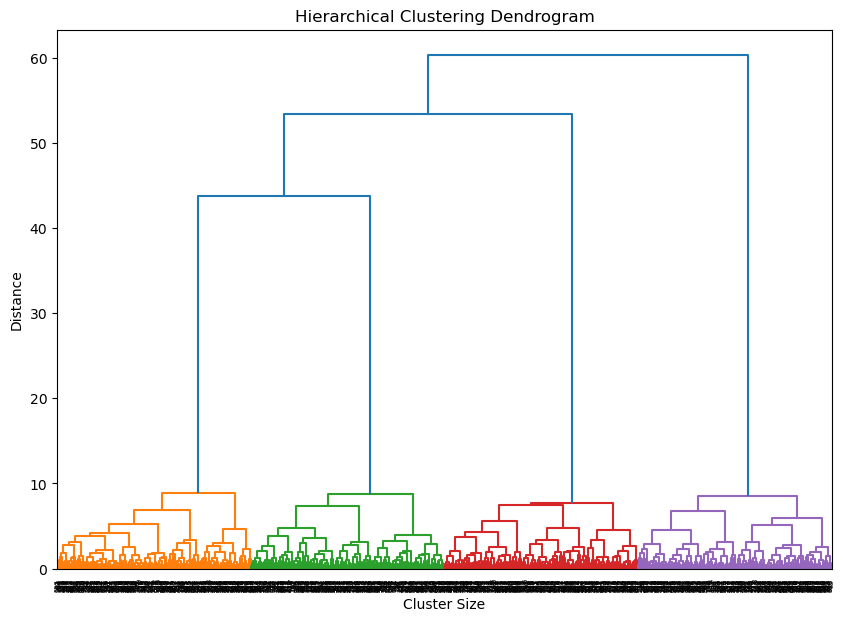

In [4]:

from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(dataset_scaled, method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

From the above Dendrogram we can cross verify with the elbow method that 4 clusters is the optimal number of clusters for our dataset.